# **스테이지 5. Feature Engineering**

In [1]:
# drive에 연결합니다.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 현재 데이터가 있는 공간으로 작업 경로를 변경해줍니다.
%cd "/content/drive/MyDrive/ML_Data/Dacon/데이크루6기/신용카드/open"

Mounted at /content/drive
/content/drive/MyDrive/ML_Data/Dacon/데이크루6기/신용카드/open


## **Intro**<br>

스테이지 4에서는 다양한 데이터 시각화 도구를 사용해서 데이터의 특징을 파악해보았습니다.<br>
이번 스테이지에서는 더 좋은 예측 결과를 만들기 위해 특성 공학(feature engineering)을 진행해주겠습니다!<br>

<img src="https://www.digitalvidya.com/blog/wp-content/uploads/2019/07/Untitled-Design-3-1170x630_cc0561dd420dfaaa5b401ee15eaceb65.jpg">

🙋 <font color=blue>**Feature Engineering**</font>이 무엇인가요?<br>

Feature Engineering(특성 공학)은 **원본 데이터의 특성을 추출하거나 변형**하여 <font color=red>**모델의 성능을 향상**</font>시키는 과정을 말합니다.<br>
이를 통해 예측 또는 분류와 같은 작업을 수행할 때 더 나은 결과를 얻을 수 있도록 도와줍니다.

**< 스테이지 2. 데이터 확인 >** 기억 나시나요?<br>
스테이지 2에서 저희는 간단하게 데이터프레임을 살펴보면서 결측치 처리와 음수인 날짜 데이터를<br>
1년을 기준으로 바꿔주는 작업을 했었습니다.<br>
이전 작업들이 바로 Feature Engineering의 일종입니다!✨<br>
이번 스테이지에서는 좀 더 심도 있는 Feature Engineering을 학습해보겠습니다~

이전 스테이지에서 EDA를 통해 알게 된 데이터의 특징을 정리해볼게요!

EDA를 통해서 알게 된 사실들을 다음과 같이 정리해줄 수 있을 것 같아요.🔍<br>

* 전체적인 `credit` 데이터는 2 - 64.13%, 1 - 23.69%, 0 - 12.18%의 분포를 가지고 있습니다.

* `FLAG_MOBIL` 변수는 모두 1의 값을 가지고 있었습니다.

* Numerical 변수에서는 `credit` 2인 사람들의 `begin_month` 분포가 큰 쪽에 있는 것을 볼 수 있었습니다.

* Numerical 변수에서 `income_total`, `DAYS_EMPLOYED`는 치우쳐진 분포를 보였습니다.

* `child_num`, `family_size`는 이상치 데이터(5 초과)를 확인할 수 있었습니다. 이상치 데이터는 `credit` 2에서만 확인할 수 있었습니다.

* `child_num`과 `family_size`는 매우 큰 상관관계(0.89)가 있었습니다.

* Categorical 변수들의 경우 균등하게 분포하고 있지 않습니다.

* `edu_type`, `family_type`, `house_type`은 70% 이상의 대부분을 차지하는 값이 있었습니다.

* `occyp_type`의 경우 직업에 따라, 특히 값이 적어질수록 `credit`의 분포가 다름을 알 수 있었습니다.

이제 위의 특징들을 데이터셋에 녹여서 만들어주도록 할게요!

먼저 데이터를 불러오도록 하겠습니다.

In [2]:
# pandas 패키지를 pd라는 별칭으로 불러옵니다.
import pandas as pd

# train 데이터를 불러옵니다.
train = pd.read_csv('train.csv')
# test 데이터를 불러옵니다.
test = pd.read_csv('test.csv')
# submission 데이터를 불러옵니다.
submission = pd.read_csv('sample_submission.csv')

In [3]:
# train 데이터를 확인합니다
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.079452,12.901370,1,0,0,0,No job,2.0,6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,4.219178,1,0,0,1,Laborers,3.0,5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.293151,12.147945,1,0,1,0,Managers,2.0,22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,5.731507,1,0,1,0,Sales staff,2.0,37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.197260,5.767123,1,0,0,0,Managers,2.0,26.0,2.0


## **Step 1. 불필요한 변수 제거**

첫 번째로, 불필요한 변수를 제거해주도록 할게요.<br>
의미없는 변수들은 **Over-fitting**이 발생하도록 만들기 때문에 제거해주는 것이 좋습니다!


💡 Over-fitting이란?

Over-fitting은 학습 데이터에 과적합되어 있는 상태를 의미합니다.<br>
이는 일반적인 패턴을 학습하는 데에 실패하여 충분히 학습하지 못한 Under-fitting과<br>
마찬가지로 모델링의 예측력을 떨어뜨리게 만듭니다.

<img src="https://miro.medium.com/max/1266/1*_7OPgojau8hkiPUiHoGK_w.png">

단순히 필요 없는 변수를 제거하는 것만으로도 성능의 향상을 가져올 수 있답니다!	☺️

train 데이터에서 의미없는 변수인 `index`와 `FLAG_MOBIL` 변수를 없애주도록 하겠습니다!<br>
`family_size` 변수도 `child_num`과 매우 큰 상관관계를 보였지만, `family_type`에 따른 예외 패턴을<br>
학습할 수 있기 때문에 제거하지 않도록 하겠습니다.

In [4]:
train = train.drop(columns=["index", "FLAG_MOBIL"])

test 데이터도 마찬가지로 제거해주도록 하겠습니다!

🔍️ **Inst.**<br>

✔️ test 데이터의 `index`, `FLAG_MOBIL` 변수를 없애주세요!

In [ ]:
# test 데이터에서 불필요한 변수를 제거합니다


✅ **Solution.**<br>

In [5]:
# test 데이터에서 불필요한 변수를 제거합니다
test = test.drop(columns=["index", "FLAG_MOBIL"])

## **Step 2. 치우쳐진 데이터(Skewed Data) 처리**

다음으로 치우쳐진 데이터(Skewed Data)를 처리해주도록 하겠습니다!

🙋 Skewed Data를 꼭 전처리해주어야 하나요?

Skewed Data는 데이터가 한 쪽 끝으로 치우쳐진 데이터를 의미합니다.<br>
만약 Skewed Data를 처리하지 않는다면, 많은 모델들이 제대로 학습하지 못합니다!<br>
그 이유는 Skewed Data가 **이상치**처럼 작동하기 때문입니다.<br>
특히 회귀 모델로 학습한다면 학습에 큰 악영향을 미치게 됩니다.

스테이지 4에서 boxplot을 그려보았을 때, `income_total`, `DAYS_EMPLOYED` 변수는 Skewed된 분포를 보였습니다.<br>
히스토그램을 그려서 다시 한 번 확인해보도록 하겠습니다!<br>
seaborn 패키지를 활용해서 복습해보세요!

우선 시각화를 위한 라이브러리를 불러올게요!

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

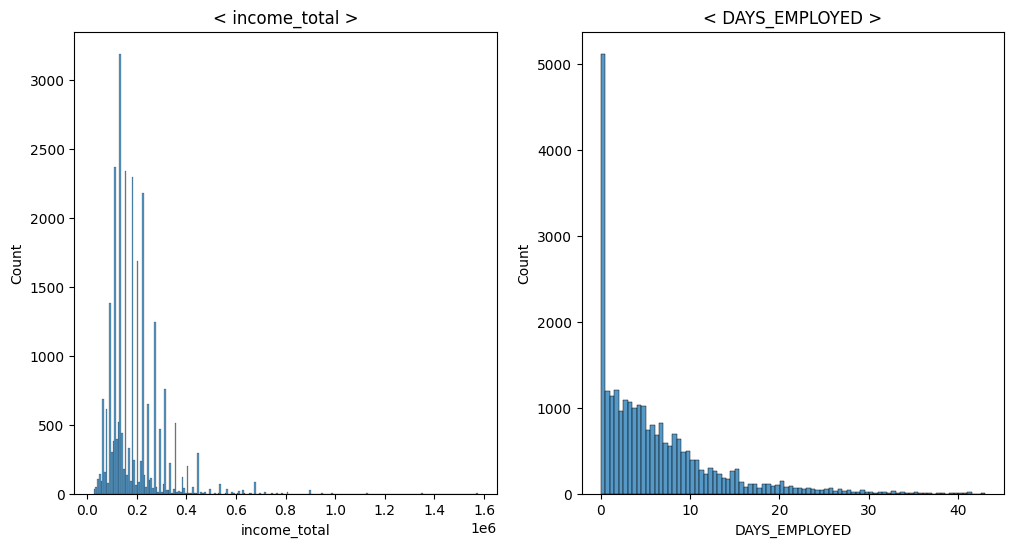

In [7]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")
plt.show()

두 그래프 모두 왼쪽으로 치우쳐진 모습을 볼 수 있습니다!<br>
이번에는 분포의 왜곡을 **수치화**해보도록 하겠습니다.<br>
분포도의 왜곡을 확인하기 위해서는 **왜도(Skewness)**와 **첨도(Kurtosis)**를 알아야 합니다.

### **왜도(Skewness)**
분포의 대칭성을 나타내는 척도입니다. 완벽하게 대칭인 분포는 0을 나타냅니다.<br>
왼쪽으로 치우친 분포의 경우, 왜도는 양수의 값을 갖게 됩니다.<br>
반대로 오른쪽으로 치우친 분포의 경우, 음수의 값을 갖게 됩니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/651px-Relationship_between_mean_and_median_under_different_skewness.png">

### **첨도(Kurtosis)**

첨도는 확률 분포의 꼬리의 두꺼운 정도를 나타내는 척도입니다.<br>
값이 3에 가까우면 산포도(퍼져있는 정도)가 정규분포에 가깝습니다.<br>
값이 3보다 작다면(K<3) 꼬리가 정규분포보다 얇은 분포로 여길 수 있습니다.<br>
값이 3보다 크다면(K>3) 꼬리가 정규분포보다 두꺼운 분포로 여길 수 있습니다.

<img src="https://keytodatascience.com/wp-content/uploads/2021/11/Kurtosis1.jpg">

왜도와 첨도는 **Scipy**패키지의 **stats** 모듈에서 각각 `skew`와 `kurtosis` 함수로 쉽게 구할 수 있습니다!

#### Scipy 패키지 설명하기

In [8]:
from scipy.stats import skew, kurtosis

각 분포의 왜도와 첨도를 히스토그램과 함께 확인해보겠습니다.

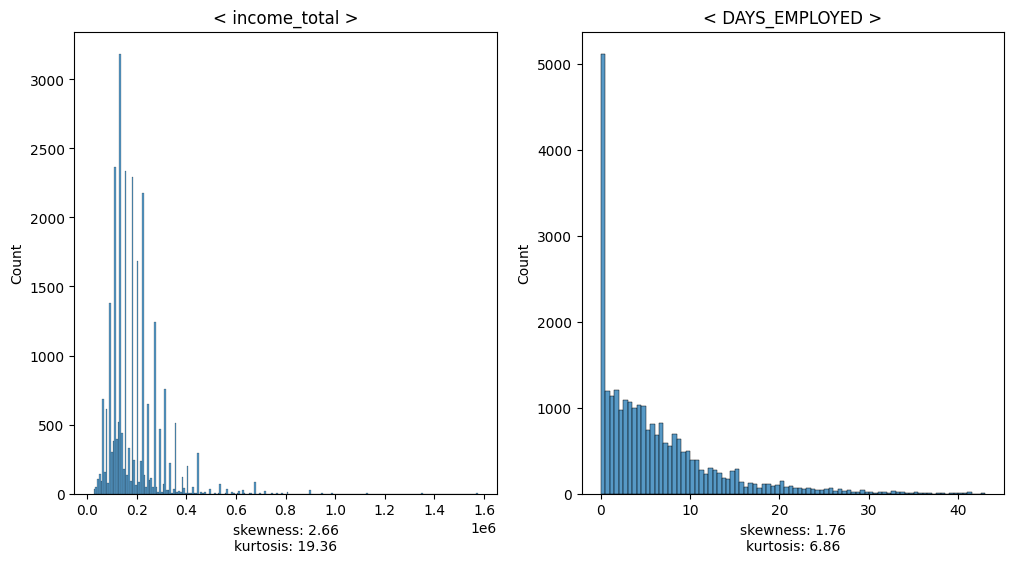

In [9]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=train, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(train[col])
  kurto = kurtosis(train[col], fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

이번에는 test 데이터에 대해서 `income_total`, `DAYS_EMPLOYED` 변수의 분포 및<br>
왜도와 첨도를 확인해보도록 하겠습니다!

🔍️ **Inst.**<br>

✔️ test 데이터의 `income_total`, `DAYS_EMPLOYED` 변수로 히스토그램을 그려보세요!<br>
✔️ 하나의 figure에 2개의 열로 그려주세요! `figsize=(12, 6)`로 설정해주도록 하겠습니다.

In [ ]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다


💡 **Hint.**<br>
matplotlib 패키지의 `subplots()` 메서드는 여러 개의 그래프를 그릴 수 있게 해줍니다.<br>
위의 예시를 참고해보세요!

✅ **Solution.**<br>
정답은 아래와 같습니다.

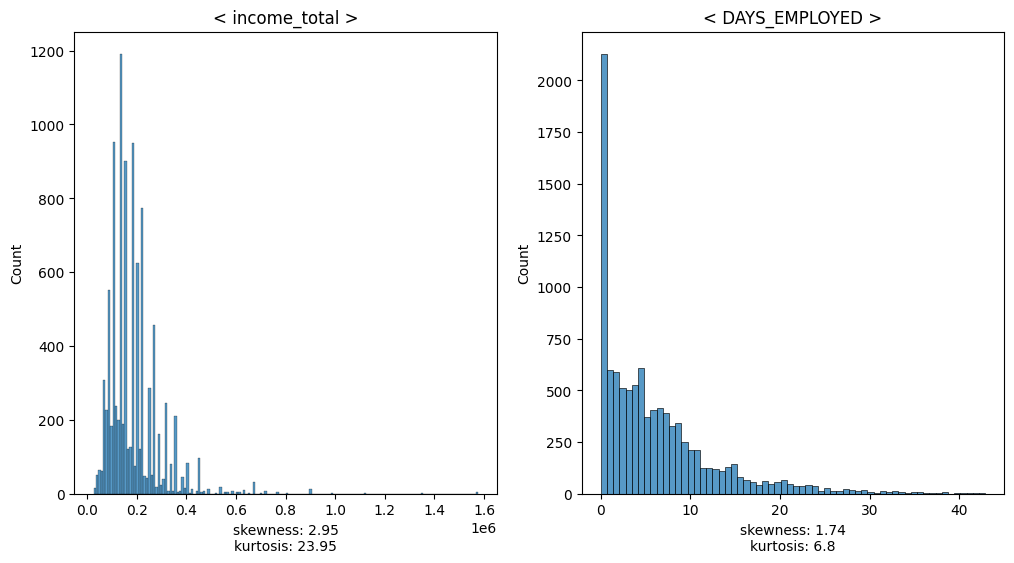

In [10]:
  # income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  sns.histplot(data=test, x=col, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(test[col])
  kurto = kurtosis(test[col], fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

그렇다면 Skewed Data는 어떻게 처리해야 할까요?<br>
바로 **로그 변환(Log Transformation)**을 통해 그래프를 정규화시켜줄 수 있습니다!<br>
데이터의 로그 변환 결과를 통해 정규분포에 가깝게 만들어줄 수 있습니다.<br>
로그 변환을 위해 Numpy 패키지의 `np.log()` 함수를 사용해주도록 하겠습니다.

아래는 train 데이터를 로그 변환했을 때의 그래프입니다!<br>
0은 로그로 정의되지 않기 때문에, `DAYS_EMPLOYED` 변수에 1을 더해주었습니다.

In [11]:
import numpy as np

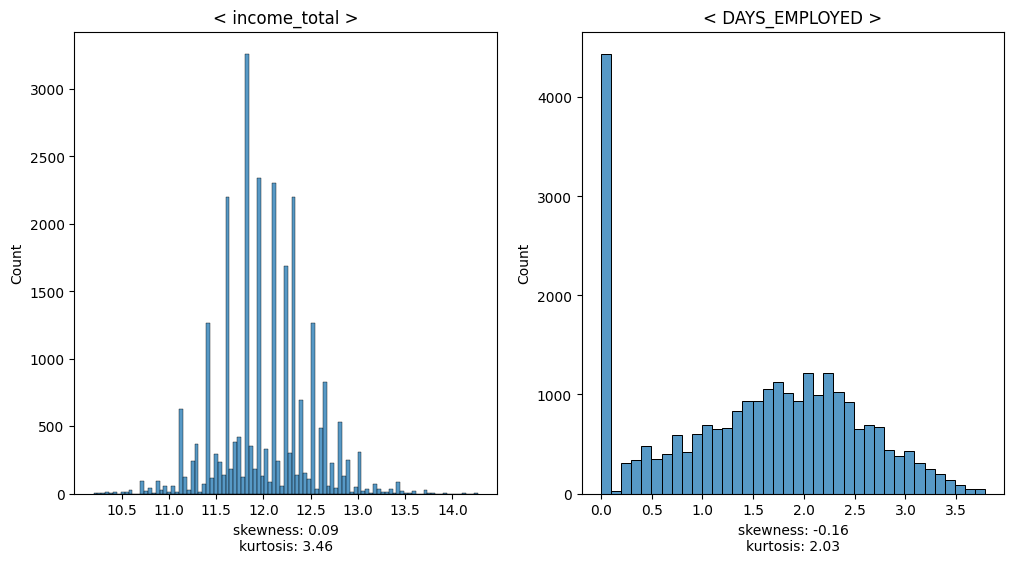

In [12]:
# income_total, DAYS_EMPLOYED 변수의 히스토그램을 그립니다

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
columns = ["income_total", "DAYS_EMPLOYED"]

for i, col in enumerate(columns):
  if i == 1:
    data = np.log(train[col] + 1)
  else:
    data = np.log(train[col])
  sns.histplot(data=data, ax=axes[i])
  axes[i].set_title(f"< {col} >")

  skewness = skew(data)
  kurto = kurtosis(data, fisher=False)
  axes[i].set_xlabel(f"skewness: {round(skewness, 2)}\nkurtosis: {round(kurto, 2)}")
plt.show()

확실하게 분포가 정규분포에 가까워졌네요!<br>
train 데이터에 로그 변환을 적용해주도록 하겠습니다.<br>
0인 데이터에는 로그 변환을 적용할 수 없기 때문에 `DAYS_EMPLOYED` 변수는 1을 임의로 더해주도록 하겠습니다.

In [13]:
# train 데이터의 income_total, DAYS_EMPLOYED 변수에 로그 변환을 적용합니다

train["income_total"] = np.log(train["income_total"])
train["DAYS_EMPLOYED"] = np.log(train["DAYS_EMPLOYED"] + 1)

🔍️ **Inst.**<br>

✔️ test 데이터의 `income_total`, `DAYS_EMPLOYED` 변수에 로그 변환을 적용해주세요!

In [ ]:
# test 데이터의 income_total, DAYS_EMPLOYED 변수에 로그 변환을 적용합니다


✅ **Solution.**<br>

In [14]:
# test 데이터의 income_total, DAYS_EMPLOYED 변수에 로그 변환을 적용합니다

test["income_total"] = np.log(test["income_total"])
test["DAYS_EMPLOYED"] = np.log(test["DAYS_EMPLOYED"] + 1)

이렇게 Skewed Data 처리도 끝났습니다~

## **Step 3. 이상치 데이터 (범주형 변수 추가)**

앞선 EDA의 결과로, `child_num` 변수에서 이상치 데이터(5 이상)를 확인할 수 있었습니다.<br>
특이한 점은, 이 이상치 데이터는 `credit=2`에서만 확인할 수 있었다는 점입니다.

일반적으로 이상치 데이터가 존재한다면, 가장 많이 하는 처리 방법은 **제거**입니다.<br>
그러나, `child_num`이 5 초과인 변수에서 뚜렷한 **패턴**이 존재했기 때문에<br>
카테고리형 변수를 추가로 만들어주도록 하겠습니다.

새로운 변수의 이름은 `child_num_over_five`라고 지어주도록 하겠습니다!<br>
이 변수는 자식 수에 따라 True, False 값을 가지는 변수입니다!

In [15]:
# 변수 child_num_over_five를 추가합니다

train["child_num_over_five"] = train["child_num"] > 5

test 데이터도 같이 변수를 추가해주겠습니다.

🔍️ **Inst.**<br>

✔️ test 데이터에 새로운 변수 `child_num_over_five`를 추가해주세요!

In [ ]:
# test 데이터에 변수 child_num_over_five를 추가합니다


✅ **Solution.**<br>

In [16]:
# test 데이터에 변수 child_num_over_five를 추가합니다
test["child_num_over_five"] = test["child_num"] > 5

## **Step 4. 중복된 행 처리하기**

한 사람당 신용카드를 한 번만 발급받을까요?<br>
신용카드 발급 월에 상관없이 여러 번 발급받는 사람도 존재할 겁니다!<br>
데이터프레임의 `duplicated()` 메서드는 중복된 행을 알려줍니다.<br>

신용카드 발급 월에 상관없이 여러 번 발급받은 데이터가 얼마나 될까요?<br>
확인해봅시다!🧐

🔍️ **Inst.**<br>

✔️ train 데이터에서 신용카드 발급 월에 상관없이 여러 번 발급받은 중복된 데이터를 확인해보세요!

In [ ]:
# train 데이터의 중복된 행을 확인합니다


💡 **Hint.**<br>
신용카드 발급 월은 `begin_month` 변수로 확인할 수 있습니다.<br>
발급 월에 상관없이 중복된 행을 알기 위해서는 `begin_month` 변수를 제거해보면 될 것 같아요!<br>
`sum()` 메서드로 중복된 행의 개수를 확인할 수 있습니다.<br>


✅ **Solution.**<br>
정답은 아래와 같습니다!

In [17]:
# train 데이터의 중복된 행을 확인합니다
train.drop(columns="begin_month").duplicated().sum()

14358

train 데이터에서 무려 14362개의 행이 중복되었네요!<br>
test 데이터도 확인해주도록 할게요.

In [18]:
test.drop(columns="begin_month").duplicated().sum()

4415

test 데이터도 4416개의 행이 중복되었다는 것을 확인할 수 있습니다.

중복 데이터가 많으면 모델의 학습에 악영향을 미칠 수 있습니다.<br>
중복 데이터는 모델의 과적합을 유발시키고, 왜곡된 결과를 만들 가능성이 높아집니다.<br>
일반적인 패턴 학습을 어렵게 만드는 것이 큰 문제라고 할 수 있습니다.

중복된 데이터를 처리해주는 가장 간단한 방법은 **제거**하는 방법입니다.<br>
그러나, train 데이터는 중복된 행의 개수가 너무 많아서 제거한다면 데이터의<br>
크기가 크게 줄어들 거에요.<br>
따라서 모델이 충분히 패턴을 학습하지 못하게 만들 수 있습니다.

🌟 따라서 제거하지 않고, 다음과 같은 방법을 적용해보겠습니다! 🌟<br>

신용카드를 여러 번 발급받는 사람들에게서 <font color=red>**패턴을 학습**</font>할 수 있도록 **새로운 변수**를 추가해줄게요!<br>
**신용카드 중복 발급 수**를 나타내는 `duplicated_num` 변수를 추가해주겠습니다.

In [19]:
# 신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가합니다

train_drop = train.drop(columns="begin_month")
duplicated_num = train_drop.groupby(train_drop.columns.tolist(), as_index=False).transform('size')
train["duplicated_num"] = duplicated_num

In [20]:
# train 데이터를 확인합니다
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,child_num_over_five,duplicated_num
0,F,N,N,0,12.218495,Commercial associate,Higher education,Married,Municipal apartment,38.079452,2.631987,0,0,0,No job,2.0,6.0,1.0,False,2
1,F,N,Y,1,12.419166,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,1.652340,0,0,1,Laborers,3.0,5.0,1.0,False,1
2,M,Y,Y,0,13.017003,Working,Higher education,Married,House / apartment,52.293151,2.576265,0,1,0,Managers,2.0,22.0,2.0,False,5
3,F,N,Y,0,12.218495,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,1.906799,0,1,0,Sales staff,2.0,37.0,0.0,False,1
4,F,Y,Y,0,11.967181,State servant,Higher education,Married,House / apartment,41.197260,1.912076,0,0,0,Managers,2.0,26.0,2.0,False,1


**코드 설명**<br>

1. train_drop은 train 데이터에서 `begin_month` 변수를 제거한 데이터프레임입니다.

2. 데이터프레임의 `groupby()` 메서드는 주어진 변수별로 **그룹화** 하는 메서드입니다.<br>
예를 들어, `groupby()` 메서드로 주어진 변수 별 평균, 중앙값 등을 계산할 수 있습니다!<br>
`as_index=False`는 그룹화된 결과를 인덱스로 사용하지 않도록 하는 파라미터입니다.
3. `transform('size')` 코드는 **행의 중복 횟수**를 계산하여 결과를 Series로 반환합니다.

🔍️ **Inst.**<br>

✔️ test 데이터에 신용카드 중복 발급 수를 나타내는 새로운 변수 `duplicated_num`을 추가해주세요!

In [ ]:
# 신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가합니다


💡 **Hint.**<br>
위의 코드를 참고해주세요!


✅ **Solution.**<br>
정답은 아래와 같습니다!

In [21]:
# 신용카드 중복 발급 수를 나타내는 duplicated_num 변수를 추가합니다

test_drop = test.drop(columns="begin_month")
duplicated_num = test_drop.groupby(test_drop.columns.tolist(), as_index=False).transform('size')
test["duplicated_num"] = duplicated_num

## **Step 5. 파생변수 만들기**

Feature Engineering을 할 때, **파생변수**를 추가하면 모델의 성능 향상을 가져올 수 있습니다!<br>

💡 파생변수란?<br>
파생변수는 기존의 변수들을 이용하여 새로운 변수를 만드는 것을 의미합니다.<br> 기존 변수에서는 파악할 수 없었던 새로운 패턴을 모델로 하여금 학습할 수 있게 하기 때문에 모델의 성능 향상에 도움을 줍니다!<br>
그러나, 자칫 아무 변수나 추가하면 모델의 예측력을 낮출 수 있기 때문에 주의해야 합니다.

### **`before_employed` 변수 만들기**

먼저 고용되기 전까지의 기간을 나타내는 `before_employed` 변수를 만들어주겠습니다.

In [22]:
# before_employed 변수 추가
train['before_employed'] =  train['DAYS_BIRTH']-  train['DAYS_EMPLOYED']
test["before_employed"] = test['DAYS_BIRTH']-  test['DAYS_EMPLOYED']

### **`house_owner` 변수 만들기**

집의 소유 여부에 따라 신용카드의 연체 정도에 영향을 미칠 수도 있을 것 같습니다!<br>
이전 스테이지에서 사용했던 `tabulate`모듈을 사용하여 `house_type`에 따른 신용도 비율을 확인해보겠습니다.🔍

In [23]:
# tabulate 모듈을 설치합니다
!pip install tabulate

In [24]:
# house_type에 따른 신용도 비율을 확인합니다

from tabulate import tabulate

output_table = []

types = train["house_type"].value_counts().index

dfs = [train[train["house_type"] == types[i]] for i in range(len(types))]

for i, df in enumerate(dfs):
  output_table.append([types[i],
                      f'{round((len(df) / len(train)) * 100, 2)}%',
                      round(df["credit"].value_counts(normalize=True) * 100, 2).astype("str") + "%"])

print(tabulate(output_table, headers=['House Type', 'Proportion', 'Credit Distribution'], tablefmt='grid'))

+---------------------+--------------+-----------------------------+
| House Type          | Proportion   | Credit Distribution         |
+=====================+==============+=============================+
| House / apartment   | 89.4%        | 2.0    64.31%               |
|                     |              | 1.0    23.54%               |
|                     |              | 0.0    12.15%               |
|                     |              | Name: credit, dtype: object |
+---------------------+--------------+-----------------------------+
| With parents        | 4.75%        | 2.0    63.09%               |
|                     |              | 1.0     24.9%               |
|                     |              | 0.0    12.01%               |
|                     |              | Name: credit, dtype: object |
+---------------------+--------------+-----------------------------+
| Municipal apartment | 3.09%        | 2.0    66.99%               |
|                     |           

확실히 집을 소유하지 않은 `Rented Apartment` 주거 타입은 나머지와 두드러진 분포의 차이를 보이네요!<br>
집의 소유 여부를 나타내는 `house_owner` 변수를 만들어주겠습니다.<br>
직접 새로운 변수를 만들어보세요!

🔍️ **Inst.**<br>

✔️ train과 test 데이터에 집의 소유 여부를 나타내는 `house_owner` 변수를 만들어주세요!

In [ ]:
# train과 test 데이터에 집의 소유 여부를 나타내는 `house_owner` 변수를 만듭니다


💡 **Hint.**<br>
`house_owner`는 집의 소유 여부를 True, False로 나타내는 변수입니다.<br>
`Rented Apartment`를 제외한 나머지 값은 집을 소유한 데이터입니다.

✅ **Solution.**<br>
정답은 아래와 같습니다!

In [25]:
# house_owner 변수 추가
train["house_owner"] = (train["house_type"] != "Rented apratment")
test["house_owner"] = (test["house_type"] != "Rented apratment")

### **`weighted_child_num` 변수 만들기**

만약에 과부나 이혼 가정이라면, 일반 가정에 비해 아이를 키우기 어려울 것입니다.<br>
이러한 `family_type`에 가중치를 주어 `weighted_child_num`이라는 새로운 변수를 만들어주겠습니다!

🔍️ **Inst.**<br>

✔️ train과 test 데이터에 아이 수에 가중치를 곱한 `weighted_child_num` 변수를 만들어주세요!<br>
✔️ `family_type`이 `widow`나 `separated`이면 `child_num * 2`를, 그렇지 않다면 `child_num * 1`을 넣어주세요.


In [ ]:
# train과 test 데이터에 아이 수에 가중치를 곱한 `weighted_child_num` 변수를 만듭니다


💡 **Hint.**<br>
데이터프레임의 `apply()` 메서드를 사용해서 각 행을 처리할 수 있습니다.

✅ **Solution.**<br>
정답은 아래와 같습니다!

In [26]:
# train과 test 데이터에 아이 수에 가중치를 곱한 `weighted_child_num` 변수를 만듭니다

train["weighted_child_num"] = train.apply(lambda row: row['child_num'] * 2
                                          if row['family_type'] in [2, 4] else row['child_num'], axis=1)
test["weighted_child_num"] = test.apply(lambda row: row['child_num'] * 2
                                        if row['family_type'] in [2, 4] else row['child_num'], axis=1)

### **`ability` 변수 만들기**

능력을 나타내는 변수인 `ability` 변수를 만들어주겠습니다!<br>
공식은 다음과 같습니다.<br>

`ability` = `income_total` / (`DAYS_BIRTH` + `DAYS_EMPLOYED`)

🔍️ **Inst.**<br>

✔️ train과 test 데이터에 능력을 나타내는 변수인 `ability` 변수를 만들어주세요!<br>

In [ ]:
# train과 test 데이터에 능력을 나타내는 변수인 `ability` 변수를 만듭니다


✅ **Solution.**<br>
정답은 아래와 같습니다!

In [27]:
# train과 test 데이터에 능력을 나타내는 변수인 `ability` 변수를 만듭니다

train['ability'] = train['income_total'] / (train['DAYS_BIRTH'] + train['DAYS_EMPLOYED'])
test['ability'] = test['income_total'] / (test['DAYS_BIRTH'] + test['DAYS_EMPLOYED'])

## **Step 6. 카테고리형 변수 변환**

카테고리형 변수는 주로 문자열 데이터로 DataFrame에서 Obejct나 category형으로 저장됩니다.<br>
하지만, 대부분의 모델들은 수치형 데이터를 입력으로 다루기 때문에 카테고리형 변수는 바로 사용하기 어렵습니다.<br>

따라서 카테고리형 변수를 모델이 이해할 수 있게 바꿔주어야 합니다!

카테고리형 변수들을 변환하는 방법은 다음과 같은 방법들이 있습니다.<br>

* One-Hot Encoding: 일반적인 카테고리형 변수 변환 방법으로, 각 변수들을 새로운 이진 변수로 바꿔줍니다.

* Label Encoding: 카테고리 값들을 0부터 n-1까지 정수로 매핑하는 방법입니다.


<img src="https://miro.medium.com/v2/resize:fit:1400/0*T5jaa2othYfXZX9W.">

sklearn의 preprocessing 모듈의 `LabelEncoder()` 함수를 사용해서 인코딩해줄 수 있습니다!<br>
train 데이터의 모든 카테고리형 변수들을 수치형 데이터로 변환해주도록 하겠습니다.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# LabelEncoder로 object 타입 변수들을 수치형 데이터로 변환해줍니다

cols = train.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
    train[col] = le.fit_transform(train[col])

test 데이터도 변환해주도록 하겠습니다.

🔍️ **Inst.**<br>

✔️ test 데이터의 object 타입 변수들을 `LabelEncoder()`로 변환해주세요!

In [ ]:
# test 데이터의 object 타입 변수들을 LabelEncoder()로 변환합니다


✅ **Solution.**<br>

In [30]:
# test 데이터의 object 타입 변수들을 LabelEncoder()로 변환합니다
cols = train.select_dtypes(include=['object'])
le = LabelEncoder()

for col in cols:
    test[col] = le.fit_transform(test[col])

## **Step 7. 전처리된 데이터 저장하기**

이렇게 전처리를 마무리해주도록 하겠습니다!<br>
마지막으로 전처리한 데이터를 저장해주도록 할게요!<br>

🔍️ **Inst.**<br>

✔️ train과 test 데이터를 저장해주도록 할게요!<br>
✔️ `index=False`로 설정해주세요!

In [ ]:
# train과 test 데이터를 저장합니다


💡 **Hint.**<br>
데이터프레임의 `to_csv()` 메서드를 사용해서 CSV 파일로 저장할 수 있습니다!<br>

✅ **Solution.**<br>

In [31]:
# train과 test 데이터를 저장합니다

train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)

**< 스테이지 5. Feature Engineering >**의 학습이 끝났습니다!<br>
변수 제거부터 파일의 저장까지 모든 과정을 함께 해보았어요~<br>
벌써 다섯 번째 스테이지까지 종료되었습니다.<br>
앞으로 우리는 한 스테이지만 남겨두고 있습니다!<br>

마지막 스테이지는 📈**스테이지 6. 앙상블 모델**📈입니다!<br>
드디어 우리가 했던 모든 과정들이 최종적인 모델링과 예측으로 결실을 맺는 스테이지에요!<br>
마지막 스테이지에서 만나요!😊